In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display,clear_output

In [2]:
# Importing the Dataset

dataset=pd.read_csv(r"C:\Users\Sarthak Arora\Analytics Vidhya\BOOTCAMP CLASSES\NYC Trip Data Duration\nyc_taxi_trip_duration.csv")
dataset.drop(columns=["Unnamed: 11","Unnamed: 12"],inplace=True)
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 9:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 6:42,17-02-2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
dataset.vendor_id=dataset["vendor_id"].astype("category")
dataset.store_and_fwd_flag=dataset["store_and_fwd_flag"].astype("category")
dataset.pickup_datetime = pd.to_datetime(dataset.pickup_datetime, format="%d-%m-%Y %H:%M")
dataset.dropoff_datetime = pd.to_datetime(dataset.dropoff_datetime, format="%d-%m-%Y %H:%M")

dataset["distance"]=111139*abs(dataset.pickup_longitude-dataset.dropoff_longitude)+abs(dataset.pickup_latitude-dataset.dropoff_latitude)
dataset["avg_speed"]=dataset["distance"]*60*60/(1000*dataset["trip_duration"])

dataset['pickup_day_name'] = dataset['pickup_datetime'].dt.day_name()
dataset['dropoff_day_name']= dataset['dropoff_datetime'].dt.day_name()

dataset['pickup_time'] = dataset['pickup_datetime'].dt.hour
dataset['dropoff_time'] = dataset['dropoff_datetime'].dt.hour

cut_bins = [0,5,10,15,20,24]
names = ['Early Morning','Office Hours','Noon Hours','Evening','Night']

dataset['Pick_time_frame'] = pd.cut(dataset['pickup_time'],bins=cut_bins,labels=names)
dataset['Drop_time_frame'] = pd.cut(dataset['dropoff_time'],bins=cut_bins,labels=names)

dataset.pickup_day_name=dataset["pickup_day_name"].astype("category")
dataset.dropoff_day_name=dataset["dropoff_day_name"].astype("category")

dataset.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
distance                     float64
avg_speed                    float64
pickup_day_name             category
dropoff_day_name            category
pickup_time                    int64
dropoff_time                   int64
Pick_time_frame             category
Drop_time_frame             category
dtype: object

In [4]:
dataset=dataset[(dataset.trip_duration<250000)]

In [5]:
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


from sklearn.model_selection import train_test_split

import category_encoders as ce

In [6]:
dataset.drop(columns=["id","pickup_datetime","dropoff_datetime"],inplace=True)

In [7]:
dataset.shape

(729321, 16)

In [8]:
# dataset=dataset[(dataset.trip_duration<250000) & (dataset.distance <200000)]

ohe= ce.OneHotEncoder(cols=["vendor_id","store_and_fwd_flag","pickup_day_name","dropoff_day_name","Pick_time_frame","Drop_time_frame"])
dataset= ohe.fit_transform(dataset)

In [9]:
dataset.columns.to_list()

['vendor_id_1',
 'vendor_id_2',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag_1',
 'store_and_fwd_flag_2',
 'trip_duration',
 'distance',
 'avg_speed',
 'pickup_day_name_1',
 'pickup_day_name_2',
 'pickup_day_name_3',
 'pickup_day_name_4',
 'pickup_day_name_5',
 'pickup_day_name_6',
 'pickup_day_name_7',
 'dropoff_day_name_1',
 'dropoff_day_name_2',
 'dropoff_day_name_3',
 'dropoff_day_name_4',
 'dropoff_day_name_5',
 'dropoff_day_name_6',
 'dropoff_day_name_7',
 'pickup_time',
 'dropoff_time',
 'Pick_time_frame_1',
 'Pick_time_frame_2',
 'Pick_time_frame_3',
 'Pick_time_frame_4',
 'Pick_time_frame_5',
 'Pick_time_frame_6',
 'Drop_time_frame_1',
 'Drop_time_frame_2',
 'Drop_time_frame_3',
 'Drop_time_frame_4',
 'Drop_time_frame_5',
 'Drop_time_frame_6']

In [10]:
y=dataset["trip_duration"]
X=dataset[['vendor_id_1','vendor_id_2','passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag_1',
 'store_and_fwd_flag_2',
 'distance',
 'avg_speed',
 'pickup_day_name_1',
 'pickup_day_name_2',
 'pickup_day_name_3',
 'pickup_day_name_4',
 'pickup_day_name_5',
 'pickup_day_name_6',
 'pickup_day_name_7',
 'dropoff_day_name_1',
 'dropoff_day_name_2',
 'dropoff_day_name_3',
 'dropoff_day_name_4',
 'dropoff_day_name_5',
 'dropoff_day_name_6',
 'dropoff_day_name_7',
 'pickup_time',
 'dropoff_time',
 'Pick_time_frame_1',
 'Pick_time_frame_2',
 'Pick_time_frame_3',
 'Pick_time_frame_4',
 'Pick_time_frame_5',
 'Pick_time_frame_6',
 'Drop_time_frame_1',
 'Drop_time_frame_2',
 'Drop_time_frame_3',
 'Drop_time_frame_4',
 'Drop_time_frame_5',
 'Drop_time_frame_6']]

# Mean Model

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=70)

In [13]:
X_train

,vendor_id_1,vendor_id_2,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_1,store_and_fwd_flag_2,distance,...,Pick_time_frame_3,Pick_time_frame_4,Pick_time_frame_5,Pick_time_frame_6,Drop_time_frame_1,Drop_time_frame_2,Drop_time_frame_3,Drop_time_frame_4,Drop_time_frame_5,Drop_time_frame_6
258927,1,0,2,-74.012894,40.702141,-73.974403,40.756489,1,0,4277.827800,...,1,0,0,0,0,0,1,0,0,0
119654,0,1,1,-73.963783,40.761295,-73.968376,40.755054,1,0,510.456554,...,0,0,0,0,1,0,0,0,0,0
272899,1,0,1,-73.974953,40.761662,-73.980423,40.754261,1,0,607.967738,...,1,0,0,0,0,0,1,0,0,0
112447,0,1,1,-73.980064,40.738586,-73.976585,40.719097,1,0,386.672070,...,0,1,0,0,0,0,0,1,0,0
529225,1,0,1,-73.954498,40.781132,-73.977425,40.787308,1,0,2548.015566,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605057,1,0,2,-73.981880,40.771309,-73.982712,40.762482,1,0,92.432020,...,0,0,0,0,0,1,0,0,0,0
152636,1,0,1,-74.009125,40.724602,-73.981407,40.768036,1,0,3080.548669,...,0,0,0,0,0,1,0,0,0,0
681277,0,1,1,-73.993843,40.741749,-73.977226,40.760284,1,0,1846.795294,...,0,0,0,0,0,1,0,0,0,0
241433,1,0,1,-74.004738,40.748531,-73.995071,40.733887,1,0,1074.333120,...,0,1,0,0,0,0,0,1,0,0


In [14]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [15]:
X_train

,vendor_id_1,vendor_id_2,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_1,store_and_fwd_flag_2,distance,...,Pick_time_frame_3,Pick_time_frame_4,Pick_time_frame_5,Pick_time_frame_6,Drop_time_frame_1,Drop_time_frame_2,Drop_time_frame_3,Drop_time_frame_4,Drop_time_frame_5,Drop_time_frame_6
0,1.0,0.0,0.222222,0.855173,0.348882,0.855860,0.730446,1.0,0.0,0.006472,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.111111,0.856050,0.352328,0.855968,0.730323,1.0,0.0,0.000772,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.111111,0.855850,0.352349,0.855753,0.730256,1.0,0.0,0.000920,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.111111,0.855759,0.351005,0.855821,0.727260,1.0,0.0,0.000585,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.111111,0.856215,0.353483,0.855806,0.733071,1.0,0.0,0.003855,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583451,1.0,0.0,0.222222,0.855727,0.352911,0.855712,0.730956,1.0,0.0,0.000140,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
583452,1.0,0.0,0.111111,0.855240,0.350190,0.855735,0.731429,1.0,0.0,0.004661,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
583453,0.0,1.0,0.111111,0.855513,0.351189,0.855810,0.730769,1.0,0.0,0.002794,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
583454,1.0,0.0,0.111111,0.855319,0.351584,0.855491,0.728520,1.0,0.0,0.001625,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
y_train_pred=np.full(len(y_train),y_train.mean())
y_pred=np.full(len(y_test),y_test.mean())

In [17]:
print(f"RMSLE_Train {np.sqrt(msle(y_train,y_train_pred))}")
print(f"RMSE_Train {np.sqrt(mse(y_train,y_train_pred))}")
print(f"MAE_Train {mae(y_train,y_train_pred)}")
print(f"RMSLE_Test {np.sqrt(msle(y_test,y_pred))}")
print(f"RMSE_Test {np.sqrt(mse(y_test,y_pred))}")
print(f"MAE_Test {mae(y_test,y_pred)}")

RMSLE_Train 0.8853992298080303
RMSE_Train 3130.467781803805
MAE_Train 615.5778700415087
RMSLE_Test 0.8844115993549237
RMSE_Test 3115.699414743687
MAE_Test 613.1690180284917


In [18]:
from sklearn import linear_model as lm

In [19]:
regr = lm.LinearRegression()

In [20]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred=regr.predict(X_test)
y_train_pred=regr.predict(X_train)

y_pred=list(map(lambda x: x if x>0 else 0, y_pred))
y_train_pred=list(map(lambda x: x if x>0 else 0, y_train_pred))

In [22]:
print(f"RMSLE_Train {np.sqrt(msle(y_train,y_train_pred))}")
print(f"RMSE_Train {np.sqrt(mse(y_train,y_train_pred))}")
print(f"MAE_Train {mae(y_train,y_train_pred)}")
print(f"RMSLE_Test {np.sqrt(msle(y_test,y_pred))}")
print(f"RMSE_Test {np.sqrt(mse(y_test,y_pred))}")
print(f"MAE_Test {mae(y_test,y_pred)}")

RMSLE_Train 0.8322100643666741
RMSE_Train 3039.811662091452
MAE_Train 410.263481736412
RMSLE_Test 0.831508427332238
RMSE_Test 3030.910286448704
MAE_Test 408.96860795941456


In [23]:
import statsmodels.api as sm

X_train=sm.add_constant(X_train)
est=sm.OLS(y_train,X_train)

result=est.fit()

print(result.summary())

ValueError: The indices for endog and exog are not aligned

## Log Transformed Target Variable

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=70)
regr = lm.LinearRegression(normalize=True)
regr.fit(X_train,np.log(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
regr.coef_

array([ 2.20607569e+09,  2.20607569e+09,  5.73984343e-03, -1.32578939e+00,
        6.14528642e-01,  1.10203510e+00, -1.22905417e+00,  2.47260260e+11,
        2.47260260e+11,  1.38628484e-04, -2.89947222e-02,  1.19828032e+12,
        1.19828032e+12,  1.19828032e+12,  1.19828032e+12,  1.19828032e+12,
        1.19828032e+12,  1.19828032e+12,  1.85478507e+11,  1.85478507e+11,
        1.85478507e+11,  1.85478507e+11,  1.85478507e+11,  1.85478507e+11,
        1.85478507e+11, -3.76699270e-02,  4.50247558e-02, -1.71896249e+11,
       -1.71896249e+11, -1.71896249e+11, -1.71896249e+11, -1.71896249e+11,
       -1.71896249e+11, -1.41281884e+11, -1.41281884e+11, -1.41281884e+11,
       -1.41281884e+11, -1.41281884e+11, -1.41281884e+11])

In [26]:
regr.intercept_

-1320047026397.4446

In [27]:
y_pred=regr.predict(X_test)
y_pred=np.exp(np.array(y_pred))

y_train_pred=regr.predict(X_train)
y_train_pred=np.exp(np.array(y_train_pred))

print(f"RMSLE_Train {np.sqrt(msle(y_train,y_train_pred))}")
print(f"RMSE_Train {np.sqrt(mse(y_train,y_train_pred))}")
print(f"MAE_Train {mae(y_train,y_train_pred)}")
print(f"RMSLE_Test {np.sqrt(msle(y_test,y_pred))}")
print(f"RMSE_Test {np.sqrt(mse(y_test,y_pred))}")
print(f"MAE_Test {mae(y_test,y_pred)}")

RMSLE_Train 0.6097126528008578
RMSE_Train 8.454860970242966e+25
MAE_Train 1.1211834737308846e+23
RMSLE_Test 0.5970427950092199
RMSE_Test 561117.1589629903
MAE_Test 2018.610400535444


In [28]:
X_train=sm.add_constant(X_train)
est=sm.OLS(np.log(y_train),X_train)

result=est.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.085e+04
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:49:58   Log-Likelihood:            -5.5710e+05
No. Observations:              583456   AIC:                         1.114e+06
Df Residuals:                  583422   BIC:                         1.115e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8131 

## Sequential Forward Selection Model

In [29]:
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LinearRegression


In [30]:
# model_LR = LinearRegression(normalize=True)
# sfs1 = sfs(model_LR, k_features=(5,20), forward=True, verbose=2, scoring='neg_mean_squared_error')
# # fit the model with  the training data
# sfs1.fit(X_train, np.log(y_train))

In [31]:
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

In [32]:
# model_LR = LinearRegression(normalize=True)
# sfs1 = sfs(model_LR, k_features=(5,20), forward=False, verbose=2, scoring='neg_mean_squared_error')
# # fit the model with  the training data
# sfs1.fit(X_train, np.log(y_train))

In [33]:
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

In [34]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X_train[feat_names].values, i) for i in range(X_train[feat_names].shape[1])]
 
# vif["features"] = X_train[feat_names].columns
 
# print(vif)

# Linear Regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error as mse

In [36]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=69)
lin_regr = LinearRegression(normalize=True)
lin_regr.fit(X_train, y_train)

y_train_pred= lin_regr.predict(X_train)
y_pred= lin_regr.predict(X_test)

mse_train= mse(y_train, y_train_pred)
mse_test= mse(y_test, y_pred)

print(mse_train)
print(mse_test)

9454028.386178248
9007967.041108545


In [37]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features):
        
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)
    
    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])
    
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

# Ridge Regression

In [38]:
#Set the different values of alpha to be tested
alpha_ridge ={"0":0,"10^-8":1e-8,"10^-7":1e-7,"10^-6":1e-6,"10^-5":1e-5,"10^-4":1e-4,"0.001":1e-3,"0.01":1e-2, "1":1, "5":5, "10":10,"20":20,"25":25}

# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)
    
    return([mse(train_y, train_y_pred), mse(test_y, test_y_pred)])


df_ridge=pd.DataFrame(columns=["Alpha","Train","Test"])
print("Errors are as follows-")
for a,b in alpha_ridge.items():
    rid=ridge_regression(X_train,y_train, X_test, y_test, b)
    df_ridge=df_ridge.append({"Alpha":a,"Train":rid[0],"Test":rid[1]},ignore_index=True)
    
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:.7g}'.format
df_ridge

Errors are as follows-


,Alpha,Train,Test
0,0,9454027,9007941
1,10^-8,9454026,9007906
2,10^-7,9454026,9007907
3,10^-6,9454026,9007912
4,10^-5,9454026,9007962
5,10^-4,9454037,9008465
6,0.001,9454796,9013060
7,0.01,9467209,9031077
8,1,9658220,9232489
9,5,9789041,9295759


# Lasso Regression

In [39]:
#Set the different values of alpha to be tested
alpha_lasso = {"0.001":1e-3,"0.01":1e-2, "1":1, "5":5, "10":10,"20": 20,"25":25}

# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(train_x,train_y)
    train_y_pred = lassoreg.predict(train_x)
    test_y_pred = lassoreg.predict(test_x)
    
    return([mse(train_y, train_y_pred), mse(test_y, test_y_pred)])


df_lasso=pd.DataFrame(columns=["Alpha","Train","Test"])
print("Errors are as follows-")
for a,b in alpha_lasso.items():
    las=lasso_regression(X_train,y_train, X_test, y_test, b)
    df_lasso=df_lasso.append({"Alpha":a,"Train":las[0],"Test":las[1]},ignore_index=True)

df_lasso

Errors are as follows-


,Alpha,Train,Test
0,0.001,9455968,9015292
1,0.01,9485768,9056547
2,1,9884998,9366925
3,5,9884998,9366925
4,10,9884998,9366925
5,20,9884998,9366925
6,25,9884998,9366925


In [40]:
sns.set(palette="Set2")

In [41]:
df_ridge

,Alpha,Train,Test
0,0,9454027,9007941
1,10^-8,9454026,9007906
2,10^-7,9454026,9007907
3,10^-6,9454026,9007912
4,10^-5,9454026,9007962
5,10^-4,9454037,9008465
6,0.001,9454796,9013060
7,0.01,9467209,9031077
8,1,9658220,9232489
9,5,9789041,9295759


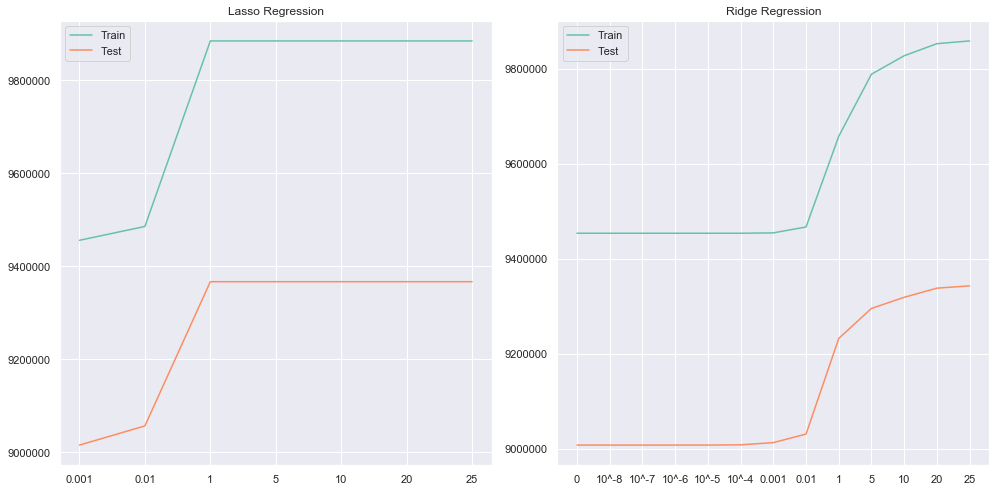

In [42]:
figure,axes= plt.subplots(nrows=1, ncols=2,figsize=(14,7))

axes[0].set_title("Lasso Regression")
axes[1].set_title("Ridge Regression")

axes[0].plot(df_lasso["Alpha"],df_lasso["Train"],label="Train")
axes[0].plot(df_lasso["Alpha"],df_lasso["Test"],label="Test")
axes[0].legend()

axes[1].plot(df_ridge["Alpha"],df_ridge["Train"],label="Train")
axes[1].plot(df_ridge["Alpha"],df_ridge["Test"],label="Test")
axes[1].legend()

plt.tight_layout()

## KNN Regression

In [43]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

In [78]:
regressor=KNNR()

regressor.fit(X_train,y_train)

y_train_pred=regressor.predict(X_train)

y_test_pred=regressor.predict(X_test)

In [79]:
mse(y_train,y_train_pred),mse(y_test,y_test_pred)

(5643639.1761894645, 8544816.869943853)

In [44]:
from sklearn.model_selection import cross_val_score

In [47]:
avg,sd=[],[]

for i in range(1,50):
    score=cross_val_score(KNNR(n_neighbors=i),scoring='neg_mean_squared_error',X=X_train, y=y_train, cv=10)
    
    avg.append(score.mean())
    sd.append(score.std())
    
    print(i,avg,sd)

1 [-8913193.856817998] [960170.6974094041]
2 [-8913193.856817998, -8758711.237279518] [960170.6974094041, 949979.6734253536]
3 [-8913193.856817998, -8758711.237279518, -8811983.548350576] [960170.6974094041, 949979.6734253536, 943500.8603403696]
4 [-8913193.856817998, -8758711.237279518, -8811983.548350576, -8866227.947210055] [960170.6974094041, 949979.6734253536, 943500.8603403696, 940584.2575468032]
5 [-8913193.856817998, -8758711.237279518, -8811983.548350576, -8866227.947210055, -8932627.673805516] [960170.6974094041, 949979.6734253536, 943500.8603403696, 940584.2575468032, 947382.764086717]
6 [-8913193.856817998, -8758711.237279518, -8811983.548350576, -8866227.947210055, -8932627.673805516, -8966115.080124024] [960170.6974094041, 949979.6734253536, 943500.8603403696, 940584.2575468032, 947382.764086717, 954085.8449643885]
7 [-8913193.856817998, -8758711.237279518, -8811983.548350576, -8866227.947210055, -8932627.673805516, -8966115.080124024, -9007637.055248002] [960170.69740940

21 [-8913193.856817998, -8758711.237279518, -8811983.548350576, -8866227.947210055, -8932627.673805516, -8966115.080124024, -9007637.055248002, -9027952.201410841, -9030822.130573247, -9039548.728859369, -9057986.587538363, -9079026.01035798, -9093866.715391729, -9104796.087772608, -9116249.673476644, -9125526.783748362, -9133305.216893675, -9145715.325302996, -9147858.848878685, -9157808.026003052, -9165222.980514262] [960170.6974094041, 949979.6734253536, 943500.8603403696, 940584.2575468032, 947382.764086717, 954085.8449643885, 952710.6693596921, 945244.9064855454, 944741.7542855879, 934805.5638916238, 941718.5222084733, 944978.3894017438, 941351.696343855, 937847.4257991414, 941750.2876463744, 942452.1663303446, 939449.7766075382, 940242.9742819575, 932163.8502658713, 931843.9410831757, 931462.4504733564]
22 [-8913193.856817998, -8758711.237279518, -8811983.548350576, -8866227.947210055, -8932627.673805516, -8966115.080124024, -9007637.055248002, -9027952.201410841, -9030822.130573

30 [-8913193.856817998, -8758711.237279518, -8811983.548350576, -8866227.947210055, -8932627.673805516, -8966115.080124024, -9007637.055248002, -9027952.201410841, -9030822.130573247, -9039548.728859369, -9057986.587538363, -9079026.01035798, -9093866.715391729, -9104796.087772608, -9116249.673476644, -9125526.783748362, -9133305.216893675, -9145715.325302996, -9147858.848878685, -9157808.026003052, -9165222.980514262, -9174948.951251077, -9180969.715175584, -9186847.227418818, -9188996.665298512, -9195243.464066867, -9202187.788947288, -9205179.152328014, -9210600.460427318, -9214971.7241964] [960170.6974094041, 949979.6734253536, 943500.8603403696, 940584.2575468032, 947382.764086717, 954085.8449643885, 952710.6693596921, 945244.9064855454, 944741.7542855879, 934805.5638916238, 941718.5222084733, 944978.3894017438, 941351.696343855, 937847.4257991414, 941750.2876463744, 942452.1663303446, 939449.7766075382, 940242.9742819575, 932163.8502658713, 931843.9410831757, 931462.4504733564, 9

KeyboardInterrupt: 

In [51]:
dfff=pd.DataFrame({"i":range(1,35),"avg":avg,"std":sd},columns=["i","avg","std"])

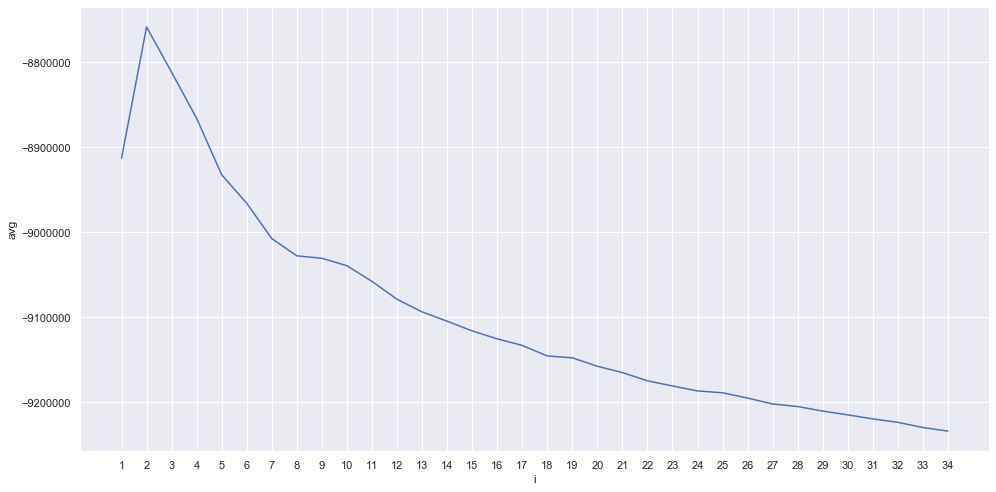

In [56]:
sns.set()

plt.figure(figsize=(14,7))

sns.lineplot(x="i",y="avg",data=dfff)

plt.xticks(range(1,35))

plt.tight_layout()

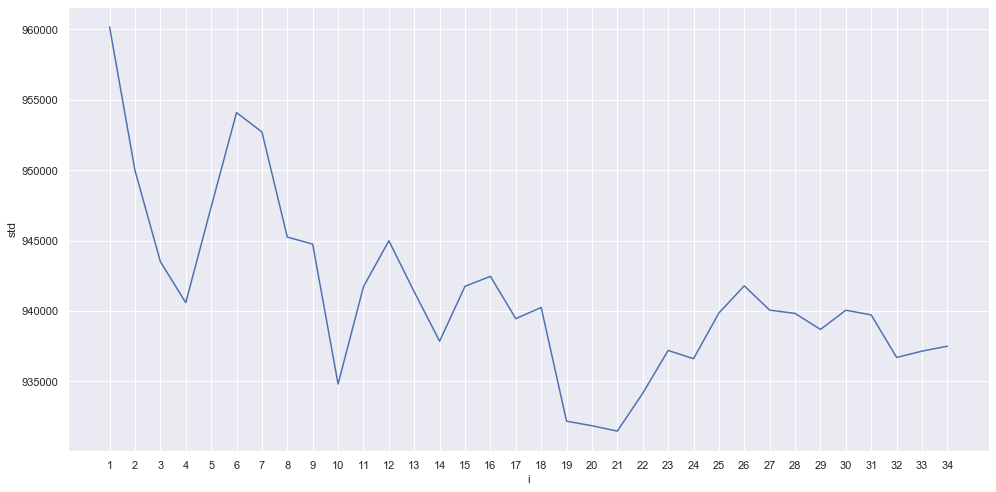

In [57]:
sns.set()

plt.figure(figsize=(14,7))

sns.lineplot(x="i",y="std",data=dfff)

plt.xticks(range(1,35))

plt.tight_layout()

In [58]:
regressor=KNNR(n_neighbors=2)

regressor.fit(X_train,y_train)

y_train_pred=regressor.predict(X_train)

y_test_pred=regressor.predict(X_test)

In [59]:
mse(y_train,y_train_pred),mse(y_test,y_test_pred)

(2224023.1833814373, 8219944.776497103)